![HERE](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTUolCmySFuP3kJnmkPvN58SBKttzm434yP6Q&usqp=CAU)

# <font size="+3" color=brown ><b> <center>Zomato Rating Prediction</center></b></font><br><a id="top"></a>

### Problem Statement- Predicting Restaurant Ratings on Zomato Using Machine Learning Models
The goal of this project is to build a predictive model that can accurately forecast restaurant ratings on Zomato based on various features such as votes, cost, location, cuisines, and more. By leveraging machine learning techniques, particularly Decision Tree Regression and Random Forest Regression, we aim to understand the key factors influencing customer ratings and improve the decision-making process for restaurant management and marketing strategies.

Table of Content
1. **Loading the dataset**
2. **Data Cleaning:**
 - Deleting redundant columns.
 - Dropping duplicates.
 - Missing Values Treatment
 - Renaming the columns.
 - Cleaning individual columns.
 - Some Transformations
3. **Data Visualization:** Using plots to find relations between the features.
 - Distribution of Rating, Cost, Votes
 - Restaurants delivering Online or not
 - Restaurants allowing table booking or not
 - Location wisw distribution
 - Top 20 Locations
 - Top 20 Rest types
 - Distribution of Types of services
 - Most Popular Cuisines in Banglore
 - Famous Restaurant Chains in Banglore
 - Top 20 Popular Casual Dining Restaurants
 - Top 20 North Indian Cuisines Restaurants
 - Relationship between Cost and Rating
 - Distribution of Votes and Cost with Online Order
 - Distribution of Cost and Votes with Table Booking
 - Distribution of Votes and Rates with Table Booking
 - Location wise Distribution of Online Order
 - Restaurants with Table Booking option wrt Location
 - Distribution of Rating with Location
 - Distribution of Rating with Rest Type
 -  Distribution of Rating with Type of Services
 - Best Affordable Restaurants in any Location
 - Which cities have the highest Purchasing Power in Banglore
4. **Regression Analysis**
 -  Decision Tree Regression
 - Random Forest Regression  

#### Columns description

- url: contains the url of the restaurant in the zomato website
- address: contains the address of the restaurant in Bengaluru
- name: contains the name of the restaurant
- online_order: whether online ordering is available in the restaurant or not
- book_table: table book option available or not
- rate: contains the overall rating of the restaurant out of 5
- votes: contains total number of rating for the restaurant as of the above mentioned date
- phone: contains the phone number of the restaurant
- location: contains the neighborhood in which the restaurant is located
- rest_type: restaurant type
- dish_liked: dishes people liked in the restaurant
- cuisines: food styles, separated by comma
- approx_cost(for two people): contains the approximate cost for meal for two people
- reviews_list: list of tuples containing reviews for the restaurant, each tuple
- menu_item: contains list of menus available in the restaurant
- listed_in(type): type of meal
- listed_in(city): contains the neighborhood in which the restaurant is listed

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random
import plotly.offline as py
import plotly.graph_objs as go
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, make_scorer

# <font color='purple'>Importing Datasets</font>

In [4]:
data=pd.read_csv("zomato.csv")

In [5]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
data.shape

(51717, 17)

In [7]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [9]:
data.describe(include='object').T

,count,unique,top,freq
url,51717,51717,https://www.zomato.com/bangalore/jalsa-banasha...,1
address,51717,11495,Delivery Only,128
name,51717,8792,Cafe Coffee Day,96
online_order,51717,2,Yes,30444
book_table,51717,2,No,45268
rate,43942,64,NEW,2208
phone,50509,14926,080 43334321,216
location,51696,93,BTM,5124
rest_type,51490,93,Quick Bites,19132
dish_liked,23639,5271,Biryani,182


### Drop insignificant columns

In [10]:
data.drop(['url','phone'],axis=1,inplace=True)

In [11]:
data.shape

(51717, 15)

### Removing duplicate values

In [12]:
data.duplicated().sum()
data.drop_duplicates(inplace=True) 
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [13]:
data.shape

(51674, 15)

### Missing value treatment

In [14]:
Total = data.isnull().sum().sort_values(ascending=False)
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
dish_liked,28047,54.276812
rate,7767,15.030770
approx_cost(for two people),345,0.667647
rest_type,227,0.439292
cuisines,45,0.087084
location,21,0.040639
address,0,0.000000
name,0,0.000000
online_order,0,0.000000
book_table,0,0.000000


- Dropping dish_liked column since it has more than half of its values as missing. We can't impute those values else it will create bias in the said column.
- Drop missing rows from 'rate' column since 15% values are missing thus cannot use imputation because it will create bias in the column and given that this column in important to keep for further analysis thus, we'll drop missing rows.
- Dropping missing rows from ''approx_cost(for two people)' as only 0.66 values are missing
- Imputing mising values in 'rest_type', 'cuisines' & location columns.

In [15]:
data.drop(['dish_liked'],axis=1,inplace=True)

In [16]:
data.dropna(subset='rate',inplace=True)
data.dropna(subset='approx_cost(for two people)',inplace=True)

In [17]:
data['rest_type'].fillna(data['rest_type'].mode()[0],inplace=True)
data['cuisines'].fillna(data['cuisines'].mode()[0],inplace=True)
data['location'].fillna(data['location'].mode()[0],inplace=True)

In [18]:
data.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [19]:
data.shape

(43656, 14)

### Renaming columns

In [20]:
data=data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

### Data Preprocessing

**Removing ',' from cost**

In [21]:
data.cost.value_counts()

cost
300      5727
400      5556
500      4323
200      3524
600      3364
         ... 
560         1
360         1
5,000       1
3,700       1
160         1
Name: count, Length: 66, dtype: int64

In [22]:
data['cost']=data['cost'].apply(lambda x: x.replace(',',""))
data['cost']=data['cost'].astype(float)

In [23]:
data['cost'].value_counts()

cost
300.0     5727
400.0     5556
500.0     4323
200.0     3524
600.0     3364
          ... 
560.0        1
360.0        1
5000.0       1
3700.0       1
160.0        1
Name: count, Length: 66, dtype: int64

In [24]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [25]:
data=data.loc[data['rate']!='NEW']
data=data.loc[data['rate']!='-']
data['rate']=data['rate'].str.replace('/5',"")

In [26]:
data['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [27]:
data['rate']=data['rate'].astype(float)

In [28]:
data.dtypes

address          object
name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [29]:
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [30]:
data['menu_item'].unique()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

In [31]:
data['address'].unique()

array(['942, 21st Main Road, 2nd Stage, Banashankari, Bangalore',
       '2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Bangalore',
       '1112, Next to KIMS Medical College, 17th Cross, 2nd Stage, Banashankari, Bangalore',
       ...,
       'Cessna Business Park, Sarjapur Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x96 Marathahalli Outer Ring Road, Kadubeesanahalli, Bellandur Post, Bengaluru, Karnataka',
       '44, Kodigehalli to Hoodi Main Road, Mahadevapura Post, KR Puram, Bangalore',
       '139/C1, Next To GR Tech Park, Pattandur Agrahara, ITPL, Main Road, Whitefield, Bangalore'],
      dtype=object)

In [32]:
data.drop(['menu_item','address'],axis=1,inplace=True)

In [33]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


### Separating numerical and categorical data

In [34]:
df_num=data.select_dtypes(include=[np.number])
df_num.columns

Index(['rate', 'votes', 'cost'], dtype='object')

In [35]:
df_cat=data.select_dtypes(include='object')
df_cat.columns

Index(['name', 'online_order', 'book_table', 'location', 'rest_type',
       'cuisines', 'reviews_list', 'type', 'city'],
      dtype='object')

### Univariate analysis for Numerical variables

### Rating Distribution

Text(0.5, 1.0, 'Distribution wrt Rating')

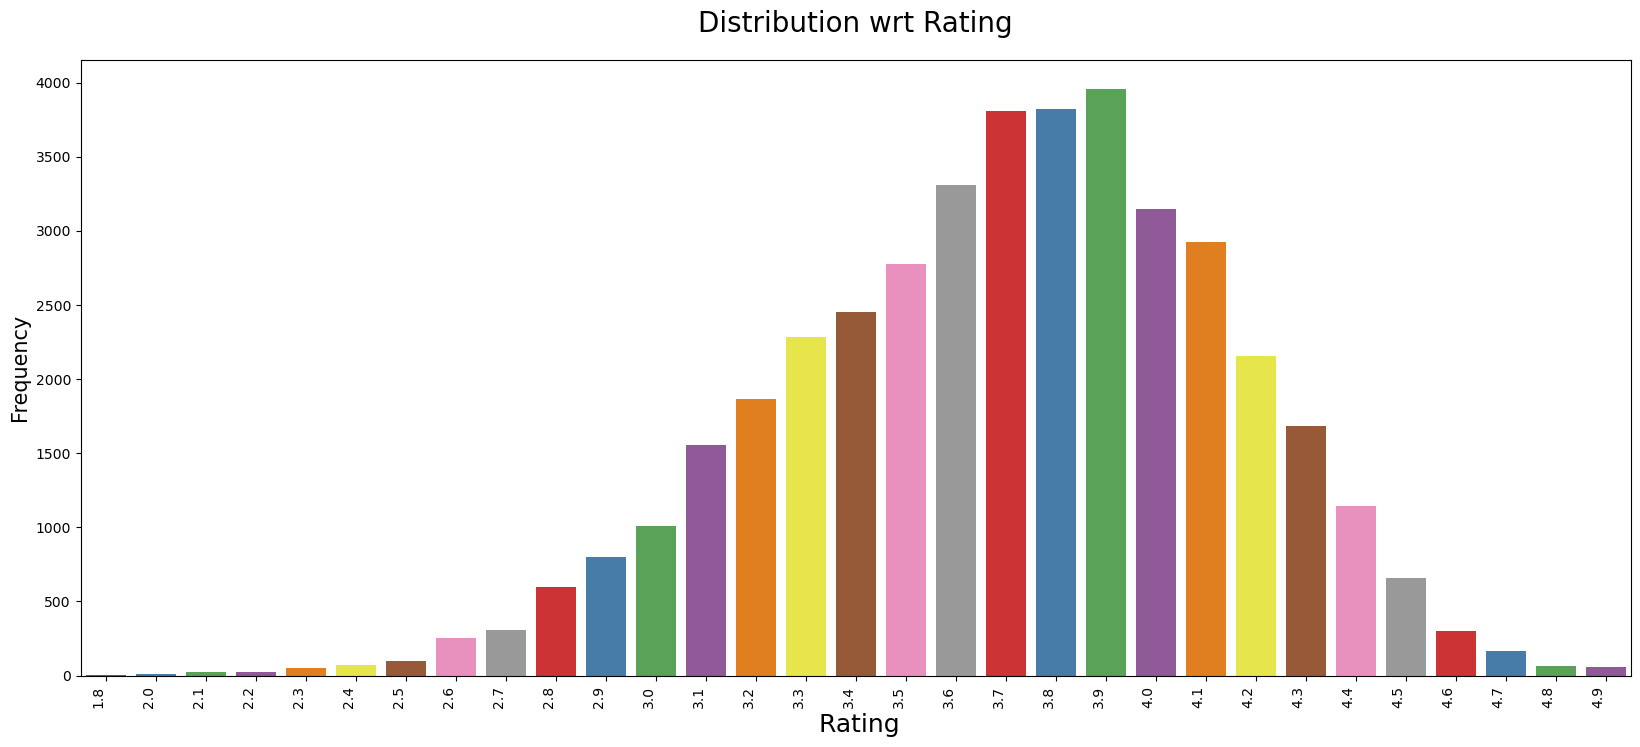

In [36]:
fig = plt.figure(figsize=(20,8))
loc = sns.countplot(x="rate",data=data, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel(" Rating",size=18)
loc
plt.title('Distribution wrt Rating',size = 20,pad=20)

### Insights
- Peak Ratings: The ratings around 3.9 to 4.0 are the most frequent, indicating that a significant number of restaurants are rated within this range.
- Normal Distribution: The distribution appears to follow a somewhat normal distribution, with most ratings clustering around the mean and fewer ratings at the extreme ends.
- Ratings Spread: The ratings range from 1.8 to 4.9, but very few restaurants have extremely low or extremely high ratings.
- Skewness: There is a slight skew towards higher ratings, which could suggest that restaurants listed on Zomato generally maintain a decent quality level, as seen by the concentration of ratings around 3.5 to 4.1.

### Cost Distribution

<Axes: xlabel='cost', ylabel='Density'>

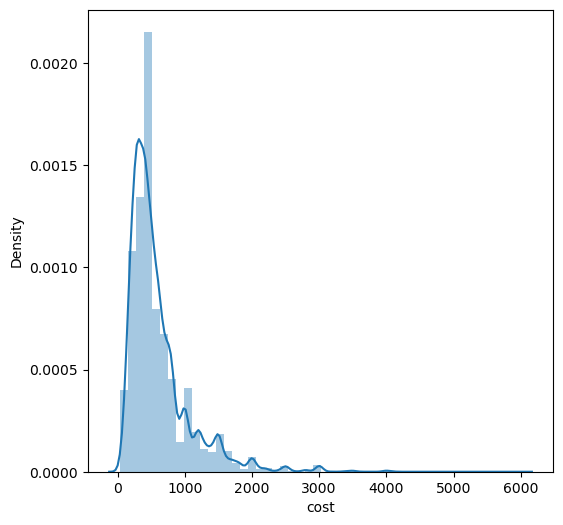

In [37]:
plt.figure(figsize=(6,6))
sns.distplot(df_num.cost)

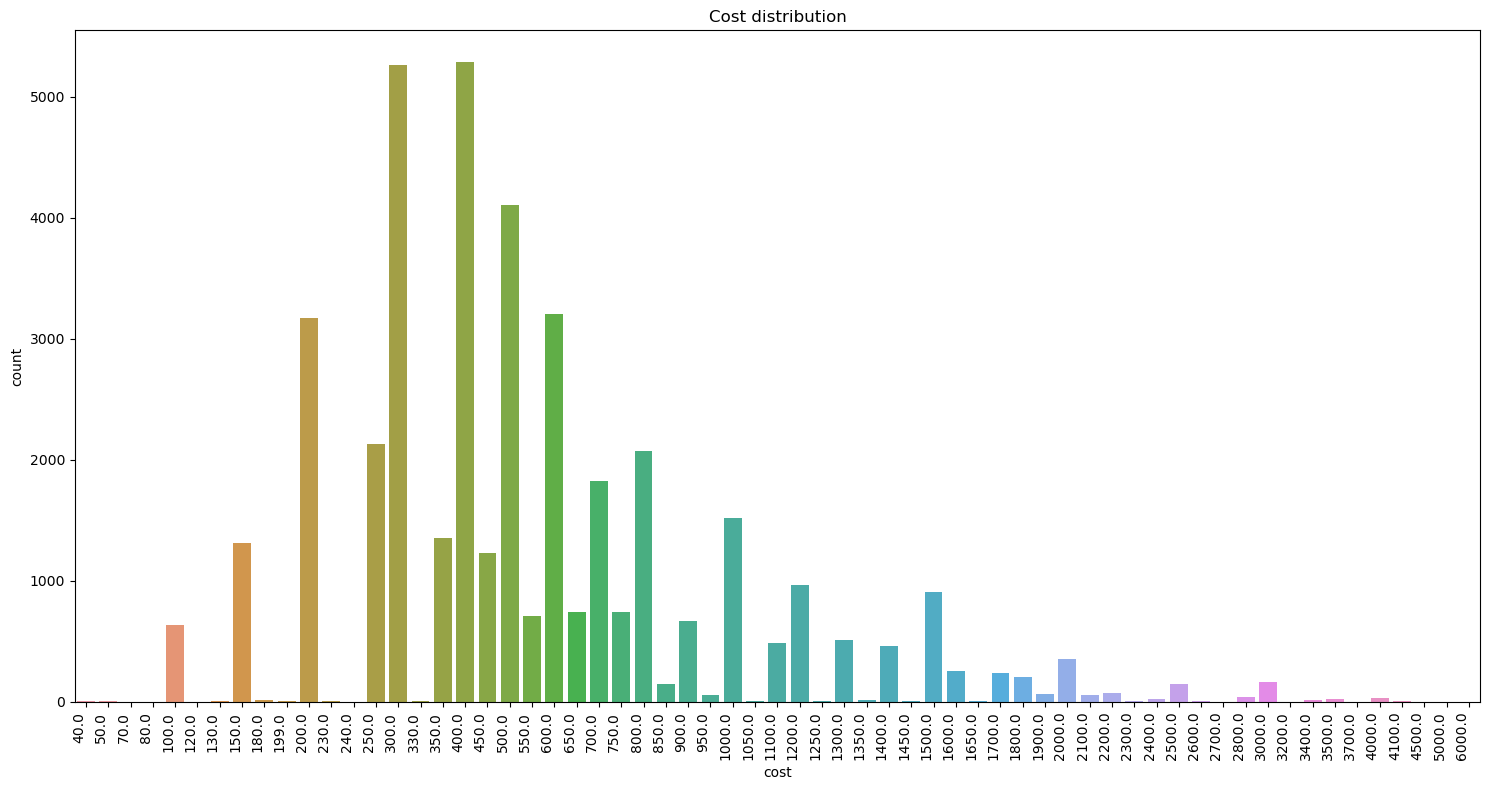

In [38]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='cost', data=df_num)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

# Set plot title
plt.title('Cost distribution')
plt.tight_layout()  # Adjust layout to make room for the rotated labels

plt.show()

We can see that the distribution if left skewed.
This means almost 90percent of restaurants serve food for budget less than 1000 INR.($15)

### Insights-
- Peak Cost Range: The most frequent cost range for restaurants is between 200 to 300 units. This indicates that a significant number of restaurants are priced within this range.
- Skewness: The distribution is heavily right-skewed, indicating that while most restaurants are moderately priced, there are some that are significantly more expensive.
- Long Tail: There is a long tail extending to higher costs, with a small number of restaurants having costs as high as 6000 units. This suggests the presence of premium or high-end dining options.
- Cost Concentration: The majority of the restaurant costs are clustered between 100 to 800 units, with very few restaurants priced below 100 units or above 1000 units.

<Axes: xlabel='votes', ylabel='Density'>

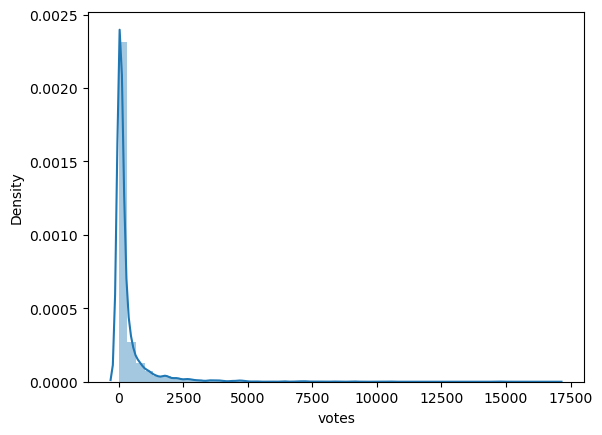

In [39]:
sns.distplot(data.votes)

### Univariate Distribution of Categorical Variables

### What is the percentage of restaurants that accepts Online Order and those who have Booking Table Option 

Text(0.5, 1.0, 'Table Booking Distribution')

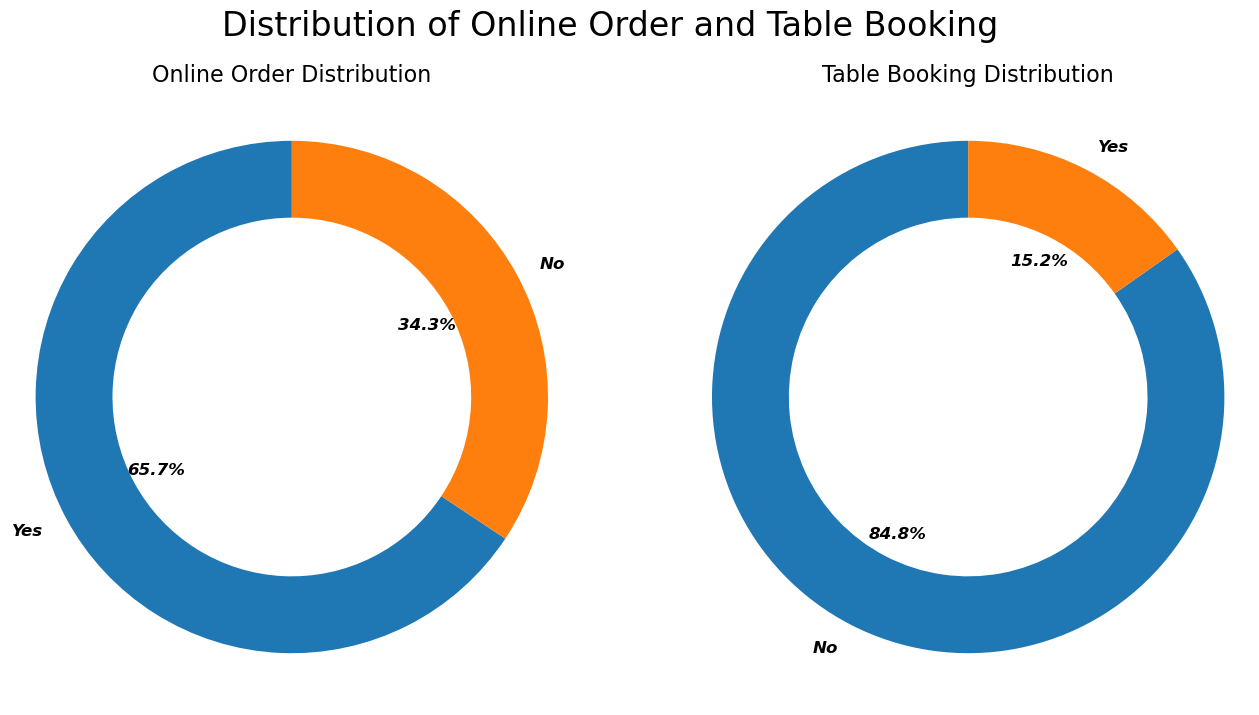

In [40]:
## Distribution of Online Order and Table Booking 
fig,axes =plt.subplots(1,2, figsize=(16,8))
fig.suptitle('Distribution of Online Order and Table Booking',size=24)


file1=data.online_order.value_counts()
axes[0].pie(file1,labels=file1.index, startangle=90, wedgeprops=dict(width=0.3), autopct='%1.1f%%',
           textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'})
axes[0].axis('equal')
axes[0].set_title('Online Order Distribution',fontsize=16)


file2=data.book_table.value_counts()
axes[1].pie(file2,labels=file2.index, startangle=90, wedgeprops=dict(width=0.3),autopct='%1.1f%%',
           textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'})
axes[1].axis('equal')
axes[1].set_title('Table Booking Distribution',fontsize=16)

### Insights-
- Online Order Distribution
    - High Adoption: A significant majority of restaurants (65.7%) offer online ordering. This indicates a strong adoption of digital ordering platforms by restaurants.
    - Potential for Growth: The remaining 34.3% of restaurants do not offer online ordering. This presents an opportunity for digital platforms to onboard these restaurants and expand their market share.

- Table Booking Distribution
    - Low Adoption: A much smaller percentage (15.2%) of restaurants offer table booking services compared to online ordering. This indicates that fewer restaurants are utilizing reservation systems.
    - Majority Without: A large majority (84.8%) of restaurants do not provide table booking options. This could indicate a market opportunity for reservation platforms or a focus area for restaurants looking to enhance their customer service offerings.
    

Digital Transformation: The higher adoption rate of online ordering suggests that digital transformation in the restaurant industry is more advanced in terms of ordering than reservations.

Customer Convenience: Restaurants focusing on improving customer convenience might consider implementing or enhancing their table booking systems.

Market Trends: The data reflects current market trends, showing a stronger emphasis on online ordering over table booking, possibly driven by changes in consumer behavior and the impact of food delivery apps.

### Location wise Distribution

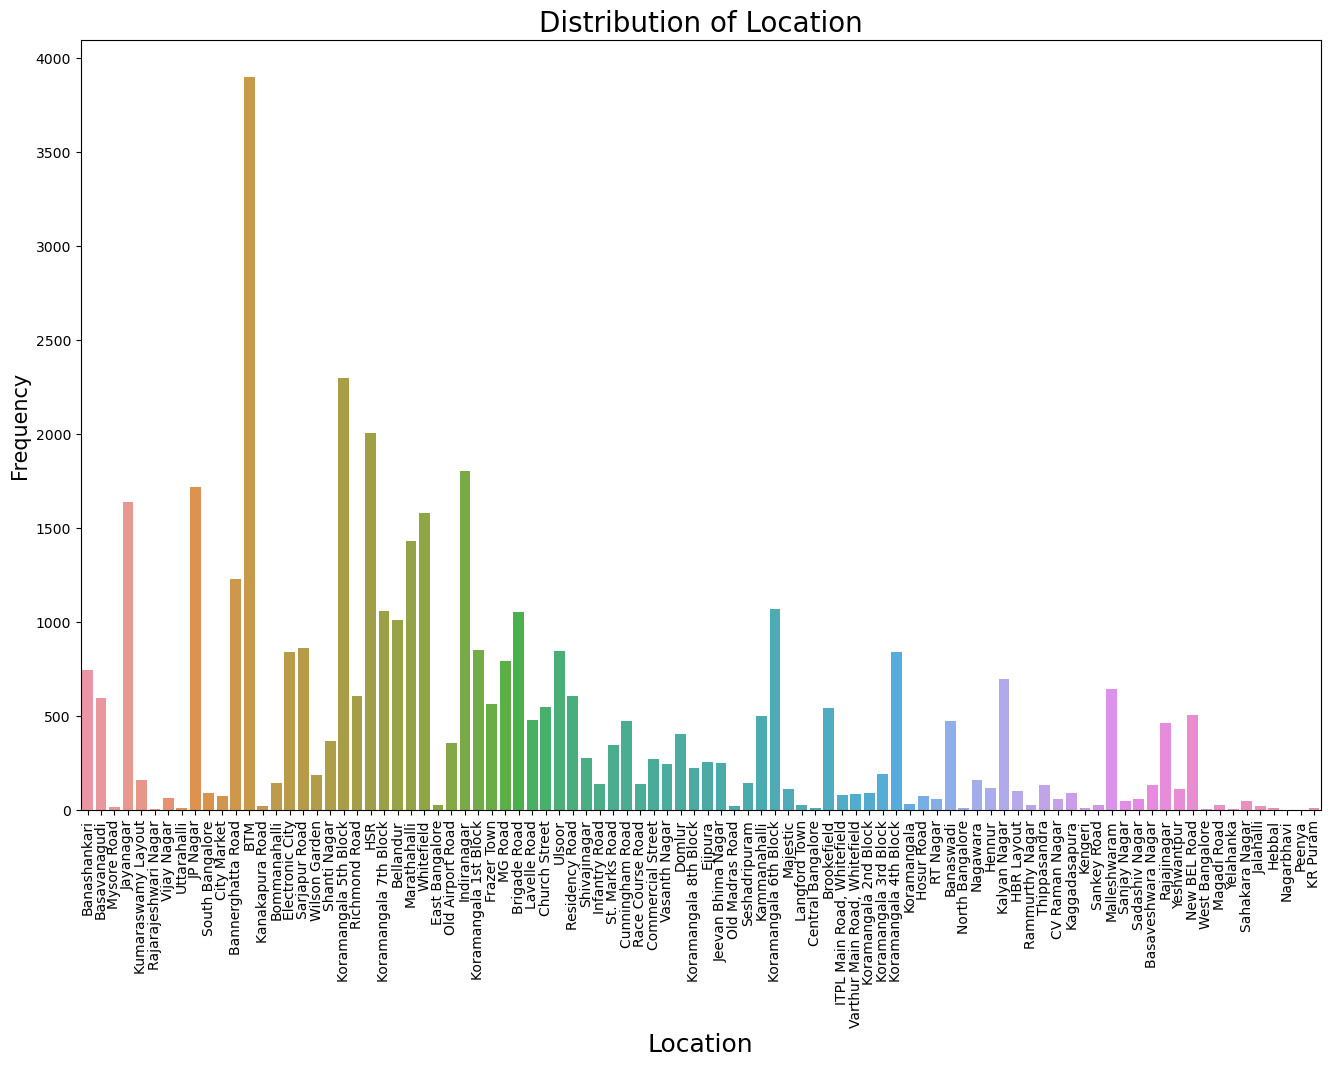

In [41]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x='location', data=data)
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
plt.title("Distribution of Location",size=20)
plt.xticks(rotation=90)
plt.show()

### Top 20 Locations

<Axes: xlabel='count', ylabel='location'>

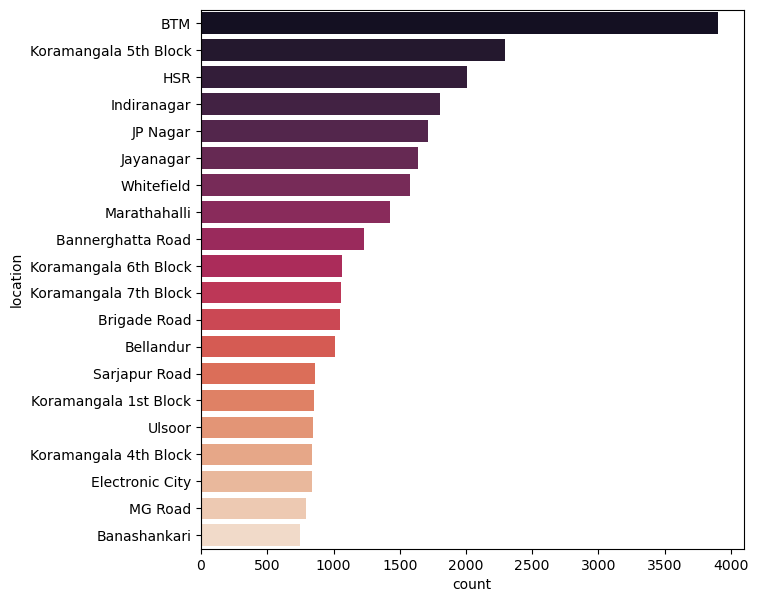

In [42]:
plt.figure(figsize=(7,7))
Rest_locations=data['location'].value_counts()[:20]
sns.barplot(x=Rest_locations,y=Rest_locations.index,palette="rocket")

### Distribution of Top 20 Restaurant types

In [43]:
rest=data['rest_type'].value_counts()[:20]

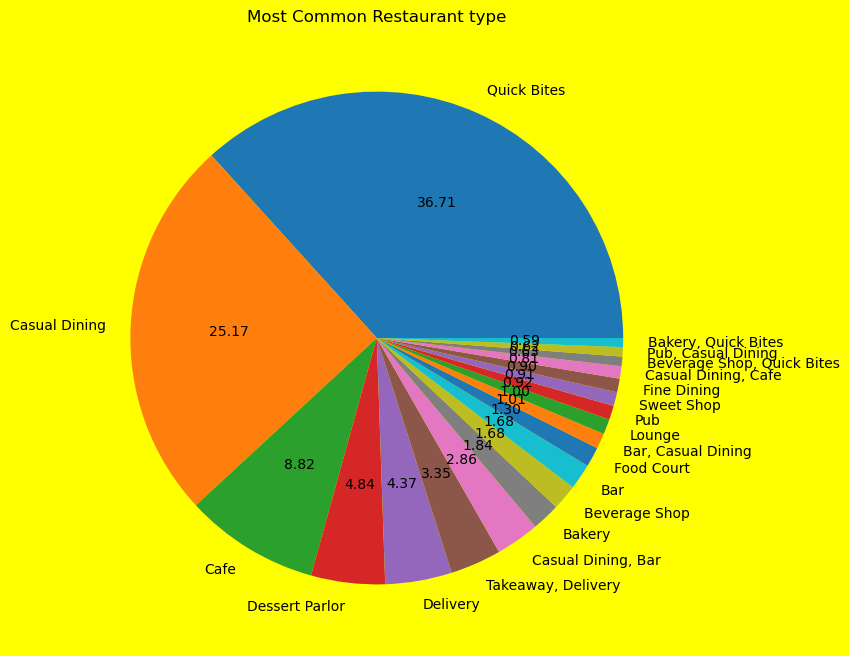

In [44]:
plt.figure(figsize=(8, 8), facecolor='yellow')  
plt.title('Most Common Restaurant type', color="black")
plt.pie(rest, autopct='%.2f', labels=rest.index)
plt.show()

### Insights-
- **Quick Bites (36.71%):**
This is the most common restaurant type among the top 20, indicating a high preference for quick, convenient dining options.

- **Casual Dining (25.17%):**
Casual dining ranks second, showing that a significant number of top-rated restaurants offer a more relaxed dining experience compared to fine dining.

- **Café (8.82%):**
Cafés are also quite popular, reflecting a trend towards places where people can enjoy coffee and light meals.

- **Dessert Parlor (4.84%):**
Dessert parlors are fairly common, suggesting a good market for sweet treats and specialty desserts.

- **Delivery (4.37%) and Takeaway & Delivery (3.35%):**
These categories combined indicate a notable demand for delivery services, especially significant in the current environment where convenience is key.

- **Casual Dining & Bar (2.86%):**
Combining casual dining with bar services is a popular choice, offering a more comprehensive dining experience.

- **Bakery (1.84%):**
Bakeries are present among the top 20, indicating a steady demand for baked goods.

- **Beverage Shop (1.68%) and Food Court (1.68%):**
Both categories are equally represented, showing a diverse preference for different types of dining experiences.

- **Bar & Casual Dining (1.07%):**
This combination, though less common, indicates a niche market for such establishments.

### Types of Services

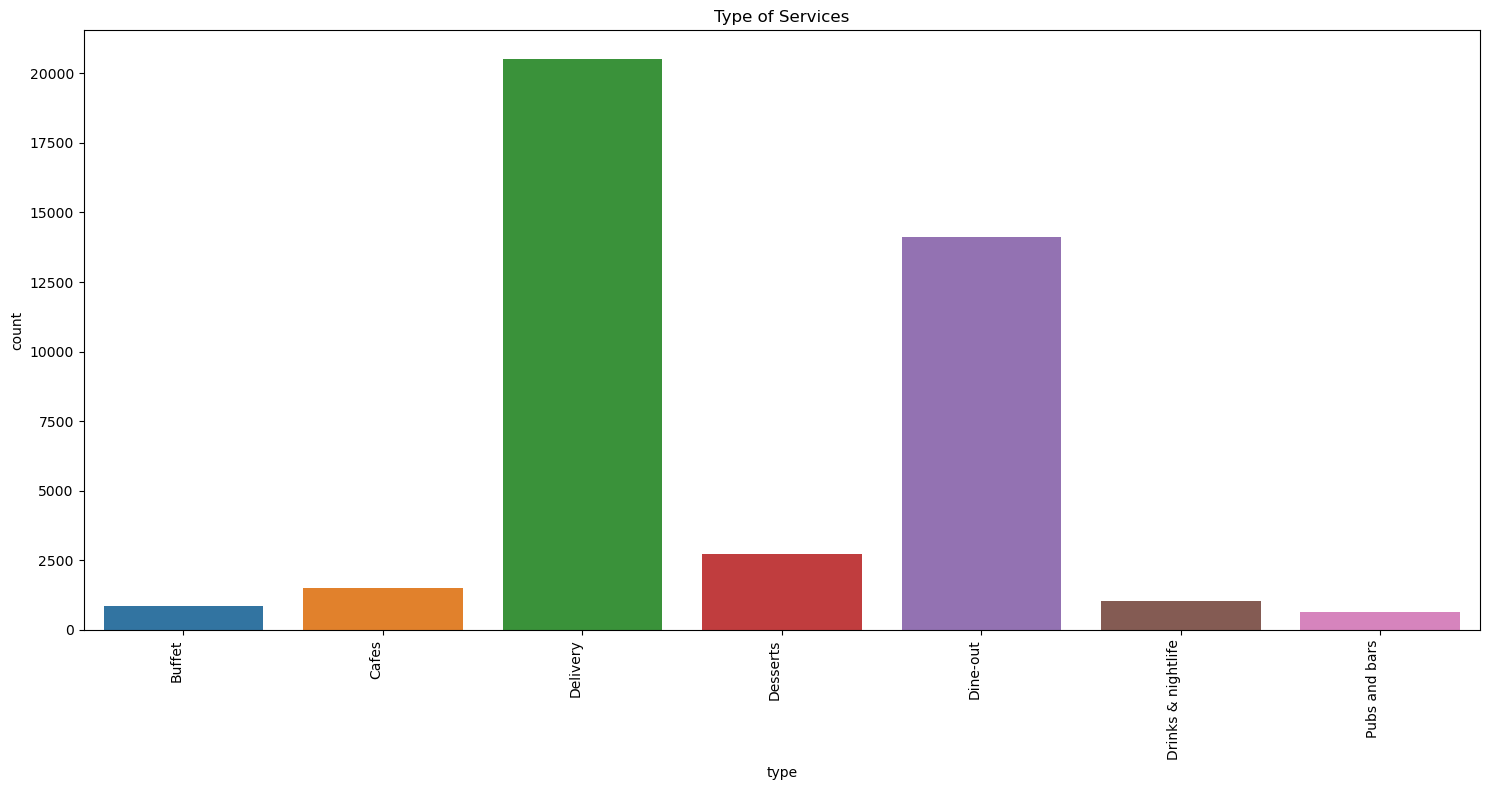

In [47]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='type', data=df_cat)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.title('Type of Services')
plt.tight_layout()  

plt.show()

### Most popular Cuisisnes of Banglore

Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

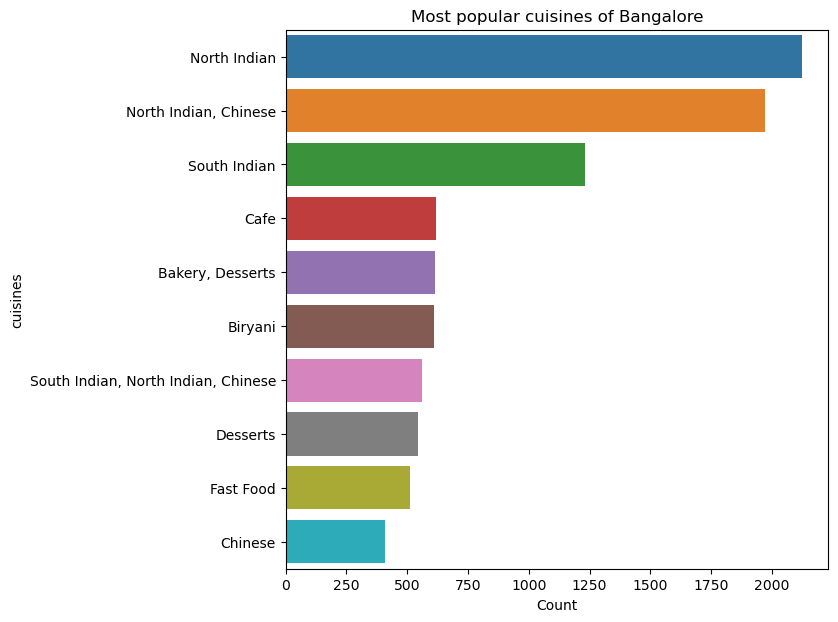

In [48]:
plt.figure(figsize=(7,7))
cuisines=data['cuisines'].value_counts()[:10]
sns.barplot(x=cuisines,y=cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

### Insights-
- **North Indian (2125 occurrences):**
North Indian cuisine is the most popular, indicating a strong preference for this cuisine among top-rated restaurants. It is a staple and highly favored in many regions.

- **North Indian, Chinese (1971 occurrences):**
The combination of North Indian and Chinese cuisines is also highly popular, showing a trend towards fusion or multi-cuisine restaurants that offer a diverse menu appealing to a wide audience.

- **South Indian (1231 occurrences):**
South Indian cuisine ranks third, reflecting its popularity and the demand for traditional South Indian dishes.

- **Café (620 occurrences):**
Café-style eateries are well-represented, indicating a strong preference for places that offer coffee and light meals, often catering to a more casual dining experience.

- **Bakery, Desserts (613 occurrences):**
This category is popular, showing that baked goods and desserts are a significant draw for customers, often attracting those looking for specialty items.

- **Biryani (609 occurrences):**
Biryani is a highly popular single-dish cuisine, suggesting a strong demand for this flavorful and aromatic rice dish.

- **South Indian, North Indian, Chinese (561 occurrences):**
This multi-cuisine combination is popular, indicating a preference for restaurants that offer a variety of options, catering to diverse tastes.

- **Desserts (545 occurrences):**
Standalone dessert shops are popular, reflecting a significant market for sweet treats and specialty desserts.

- **Fast Food (513 occurrences):**
Fast food remains a popular choice, catering to those looking for quick and convenient meal options.

- **Chinese (409 occurrences):**
Chinese cuisine alone is also a popular choice, highlighting its widespread appeal and demand.

### Famous Restaurant Chains in Bengauru

In [49]:
data['name'].value_counts()

name
Cafe Coffee Day                   86
Onesta                            85
Empire Restaurant                 69
Five Star Chicken                 68
Kanti Sweets                      68
                                  ..
Daafoodies                         1
I Siri Restaurant And Caterers     1
The Foodware Veg                   1
Hotel Thalassery                   1
SeeYa Restaurant                   1
Name: count, Length: 6627, dtype: int64

In [50]:
data['name'].value_counts()[:20]

name
Cafe Coffee Day        86
Onesta                 85
Empire Restaurant      69
Five Star Chicken      68
Kanti Sweets           68
Just Bake              67
Baskin Robbins         62
KFC                    60
Pizza Hut              60
Petoo                  60
Smoor                  59
McDonald's             59
Domino's Pizza         59
Subway                 59
Sweet Truth            58
Polar Bear             58
Faasos                 56
Beijing Bites          56
Burger King            55
Smally's Resto Cafe    54
Name: count, dtype: int64

Text(0.5, 0, 'Number of outlets')

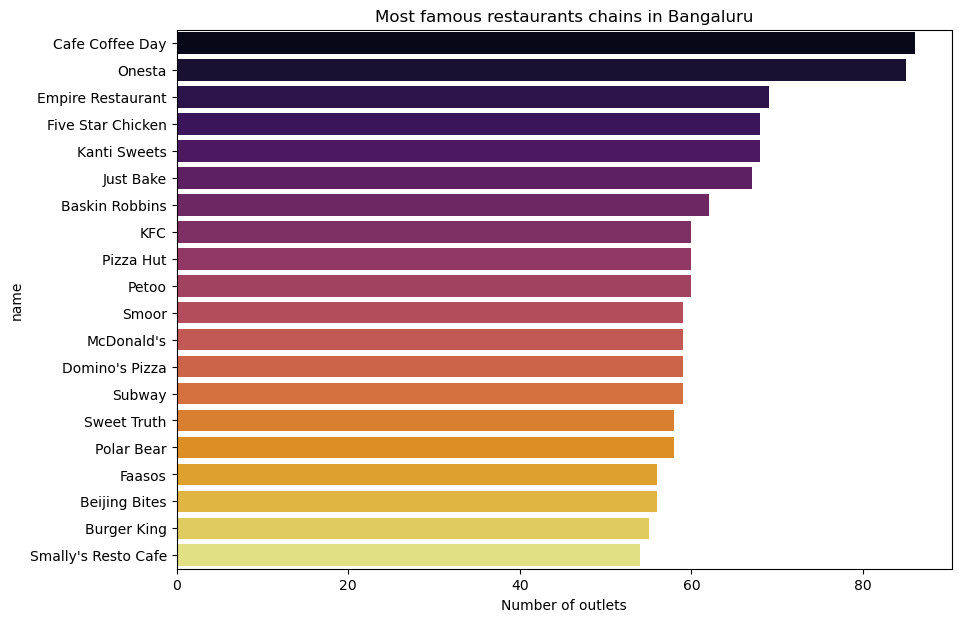

In [51]:
plt.figure(figsize=(10,7))
chains=data['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='inferno')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

Cafe coffee day,Onesta, Empire Restaurant has the most number of outlets in and around bangalore.

### Top 20 Popular Casual Dining Restaurants

In [52]:
casual=data[data['rest_type']=='Casual Dining']
casual[['name']][0:20]

,name
0,Jalsa
1,Spice Elephant
4,Grand Village
5,Timepass Dinner
6,Rosewood International Hotel - Bar & Restaurant
37,Szechuan Dragon
38,Empire Restaurant
47,Recipe
48,Beijing Bites
53,Biryanis And More


### Top 20 North Indian Cuisine Restaurants

Text(0.5, 0, 'Number of outlets')

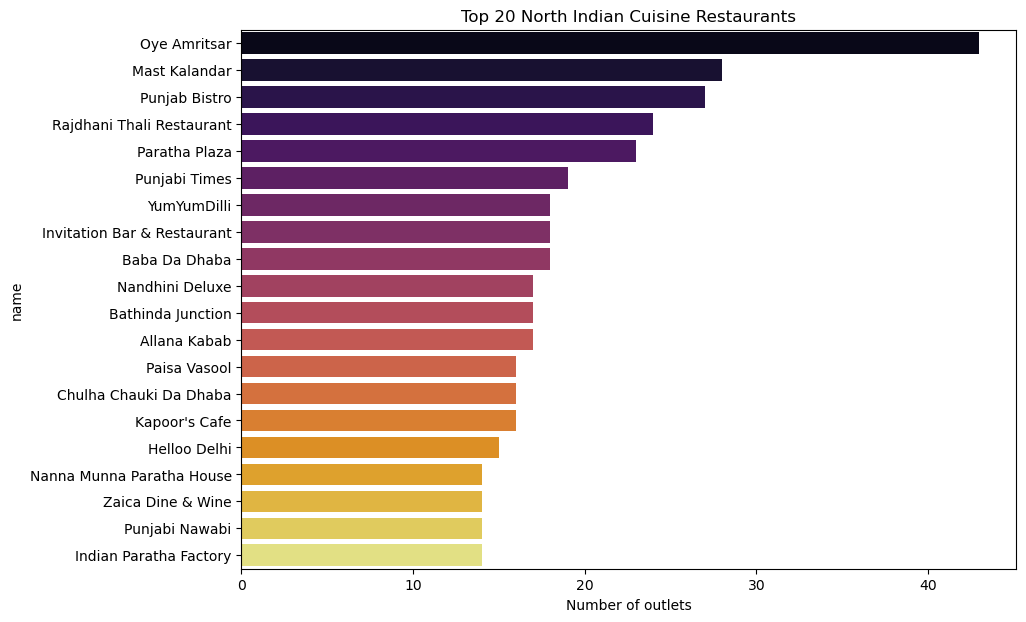

In [53]:
NI_cuisine=data[data['cuisines']=='North Indian']
plt.figure(figsize=(10,7))
rest_ni=NI_cuisine['name'].value_counts()[:20]
sns.barplot(x=rest_ni,y=rest_ni.index,palette='inferno')
plt.title("Top 20 North Indian Cuisine Restaurants")
plt.xlabel("Number of outlets")

### Bivariate Analysis

### Relationship between Cost and Rating

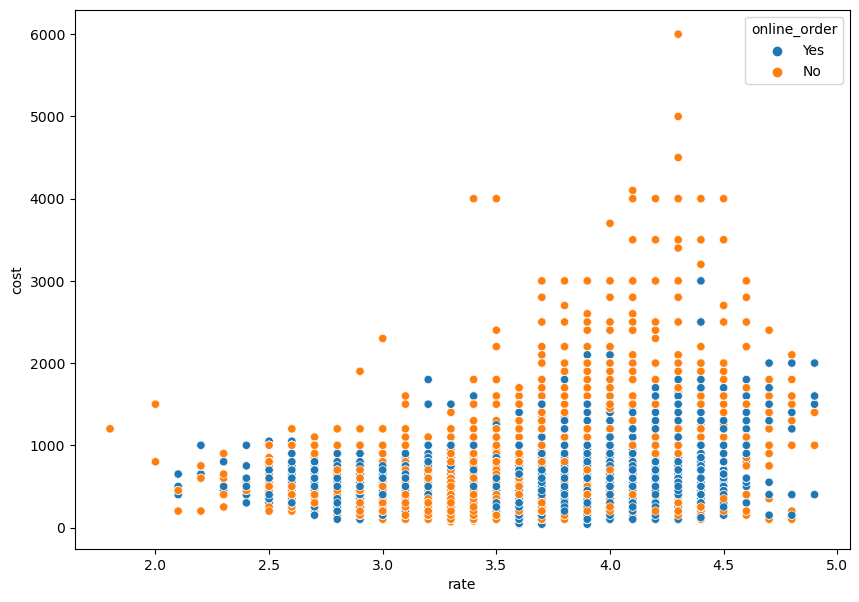

In [54]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='cost',hue='online_order',data=data)
plt.show()

### Distribution of votes and cost with online order

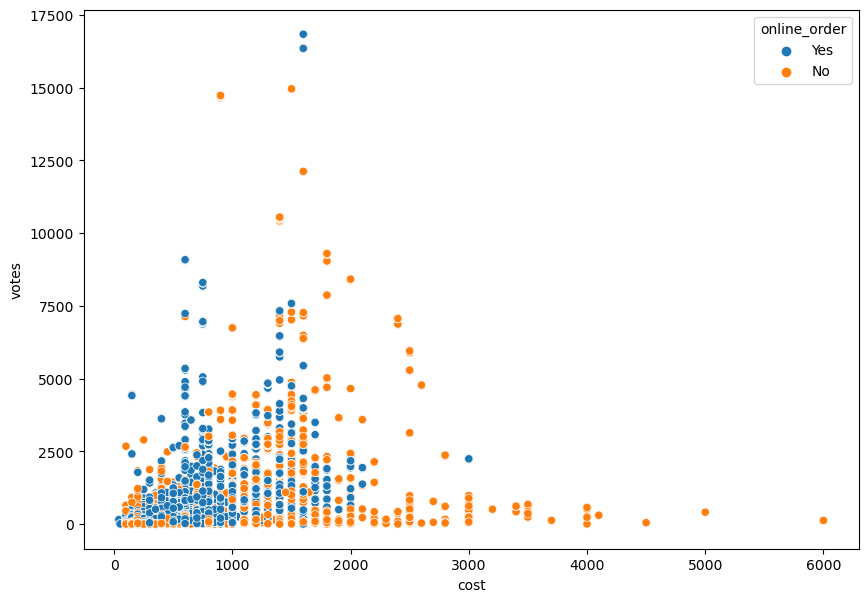

In [55]:
plt.figure(figsize=(10,7))
sns.scatterplot(y=df_num.votes,x=df_num.cost, hue=df_cat.online_order)
plt.show()

### Distribution of cost and votes with Table Booking Option

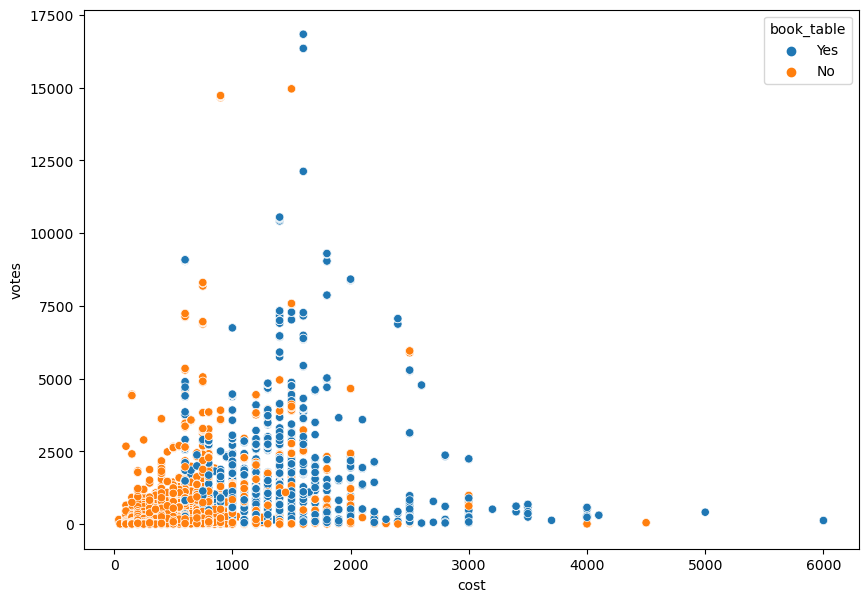

In [56]:
plt.figure(figsize=(10,7))
sns.scatterplot(y=df_num.votes,x=df_num.cost, hue=df_cat.book_table)
plt.show()

### Distribution of Votes and Rate with Table Booking Option

<Axes: xlabel='rate', ylabel='votes'>

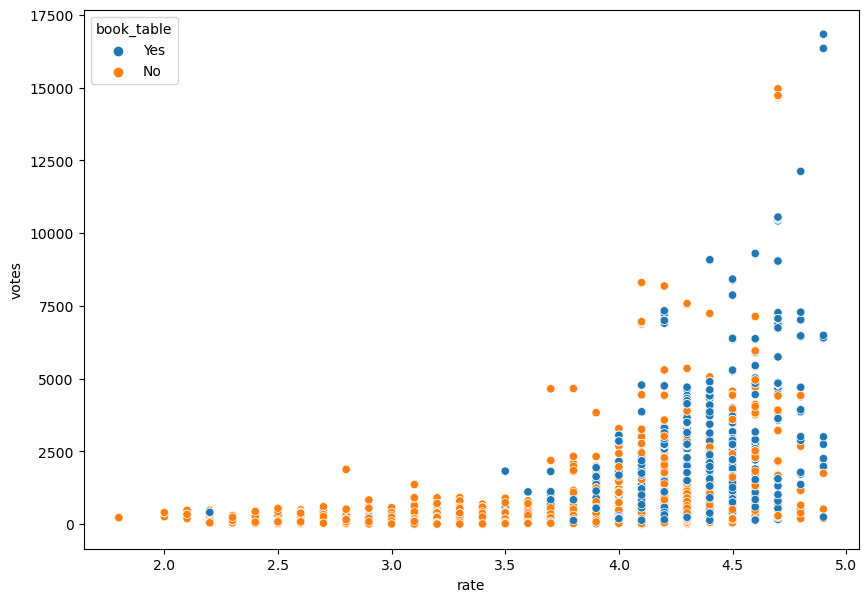

In [57]:
plt.figure(figsize=(10,7))
sns.scatterplot(y=df_num.votes,x=df_num.rate,hue=df_cat.book_table)

### Distribution of Location and Online order

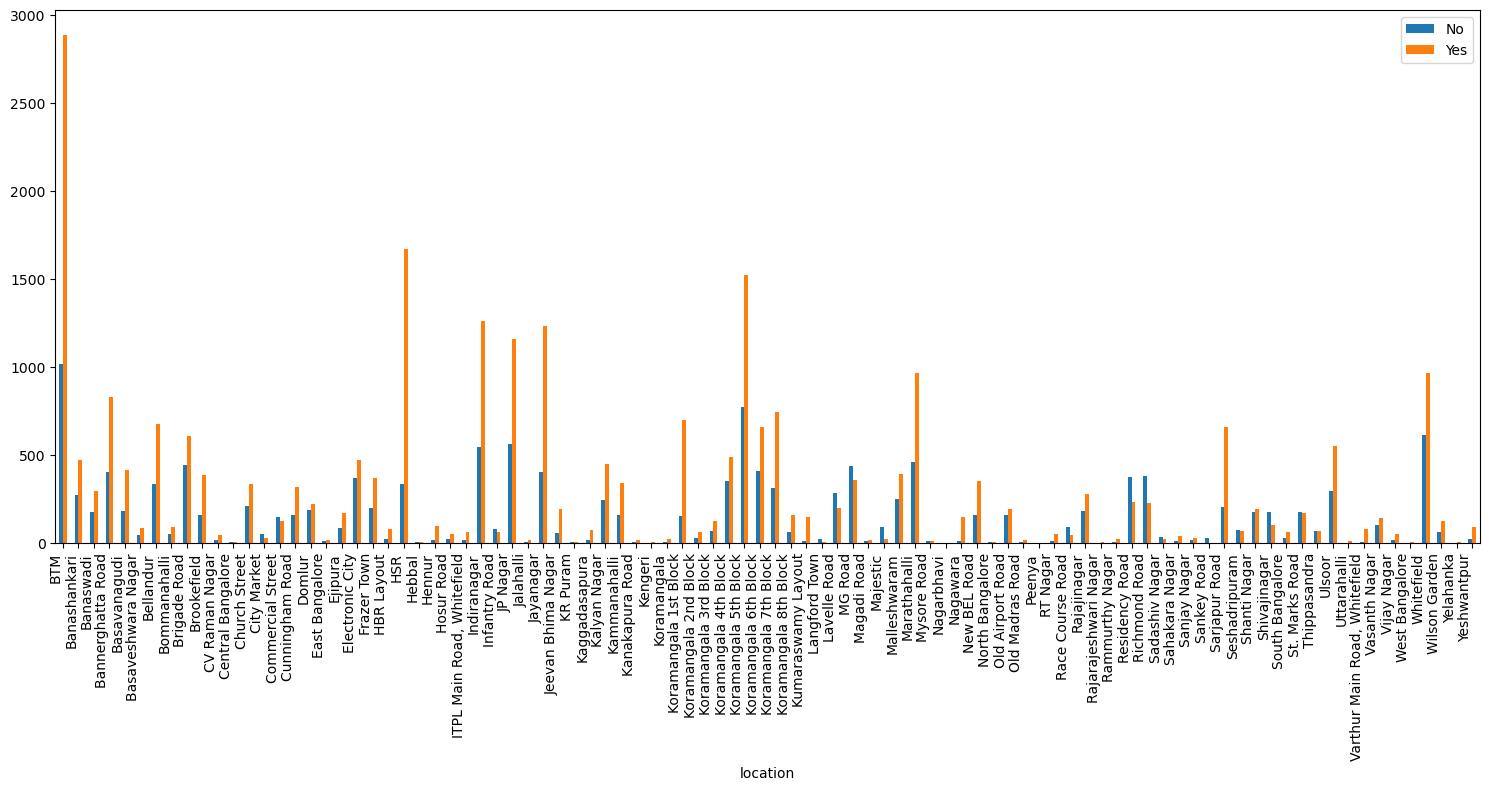

In [58]:
## Distribution of location and online order
plt.figure(figsize=(15,8))
pd.crosstab(df_cat['location'],df_cat['online_order']).plot(kind='bar',ax=plt.gca())
plt.legend()
plt.xticks(fontsize=10,rotation=90, ha='right')

# Adjust layout to fit everything
plt.tight_layout()
## ax=plt.gca--> to get the plot in full layout and get x axis values in clear view

### Restaurants with Table Booking availaibitlity with respect to Location 

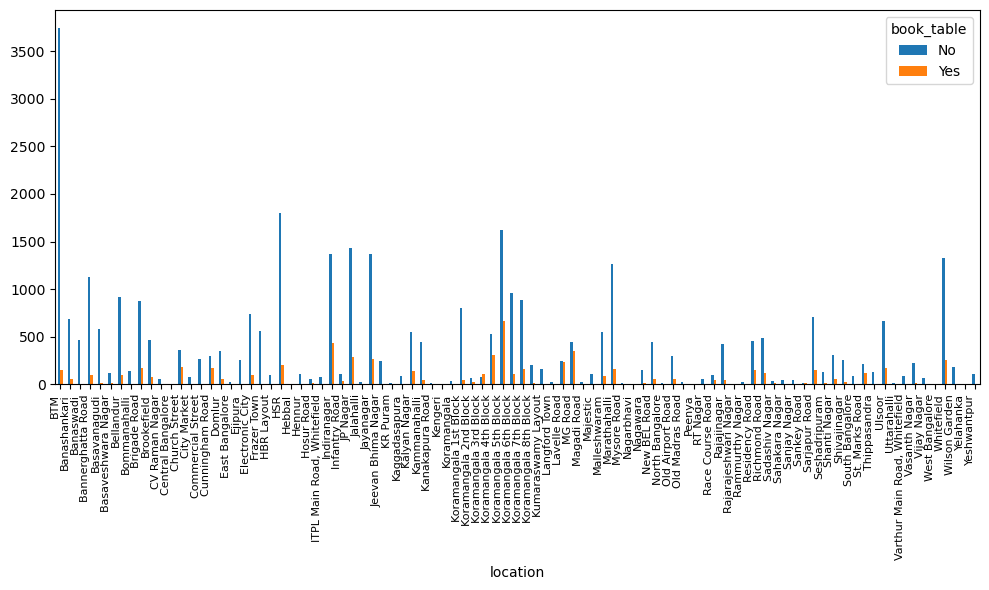

In [59]:
## Distribution of Table booking wrt Location
crosstab = pd.crosstab(df_cat['location'], df_cat['book_table'])

# Plot the crosstab
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
crosstab.plot(kind='bar', ax=plt.gca())

# Rotate x-axis labels
plt.xticks(fontsize=8,rotation=90, ha='right')

# Adjust layout to fit everything
plt.tight_layout()
plt.show()

### Distribution of Rating with Location

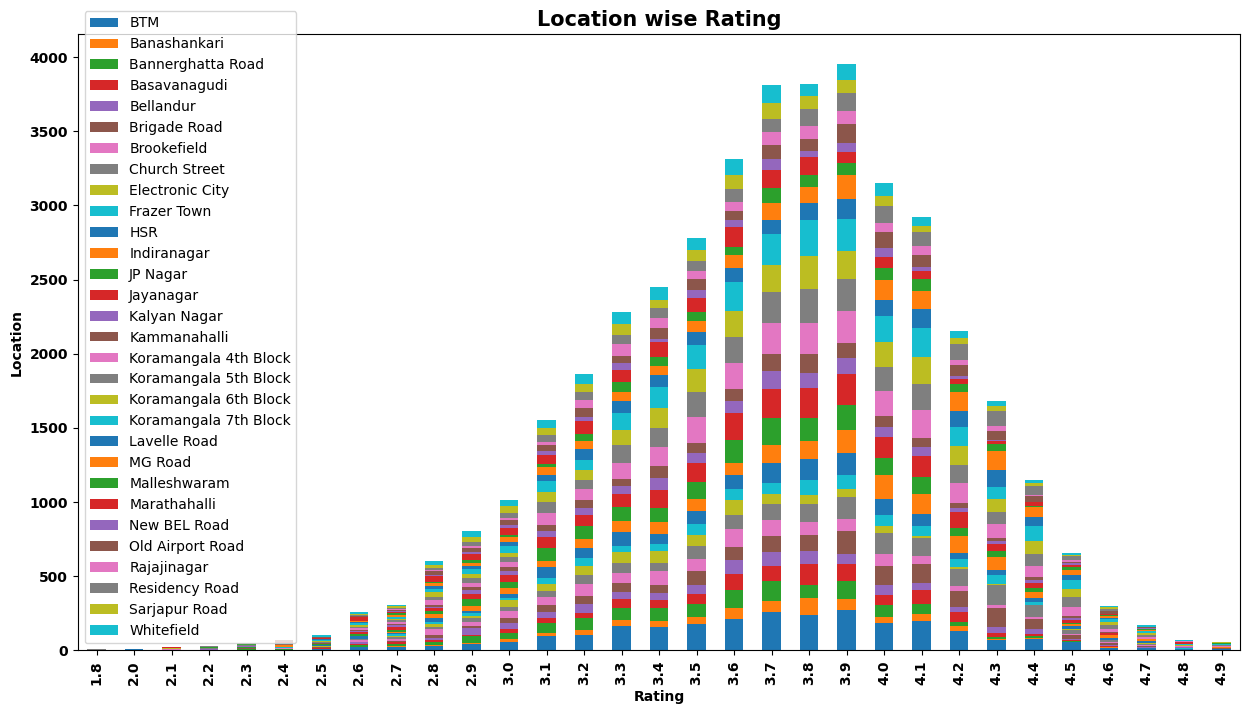

In [60]:
## Location and Rating
plt.rcParams['figure.figsize'] = (15, 8)
loc_plt=pd.crosstab(data['rate'],data['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location wise Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend();

### Distribution of Rating with Restaurant type

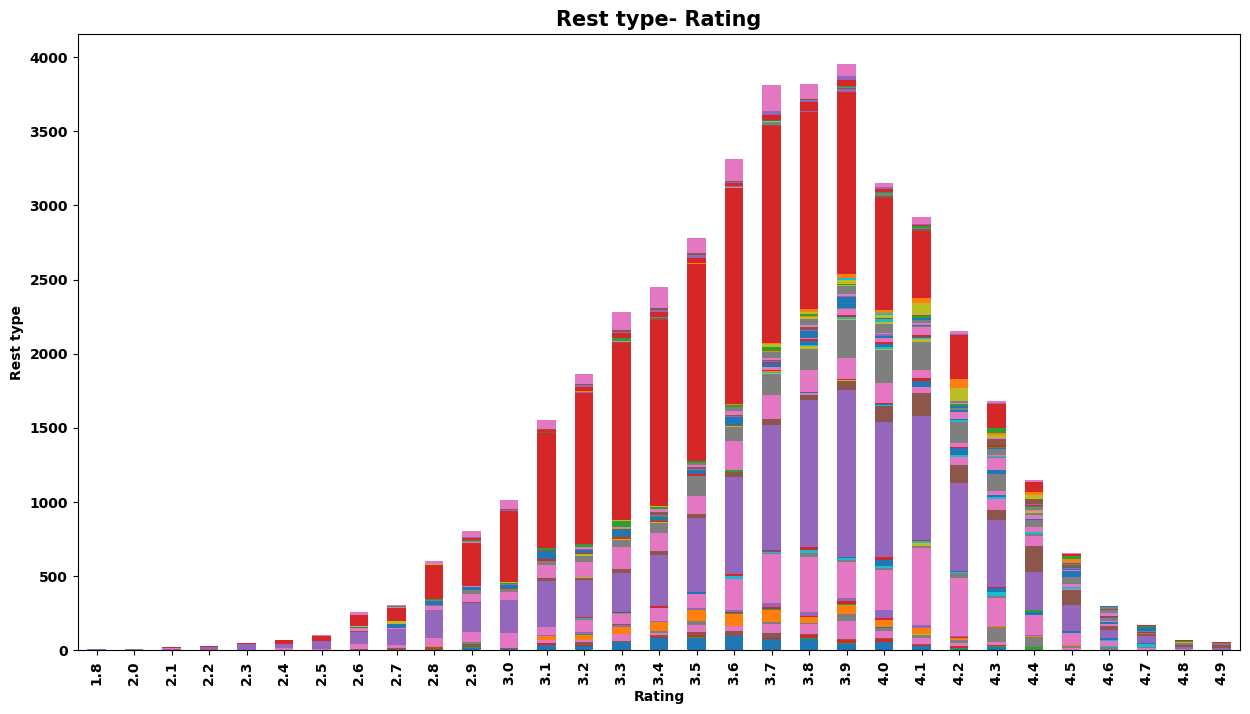

In [61]:
loc_plt=pd.crosstab(data['rate'],data['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type- Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

### Distribution of rating with Type of Service

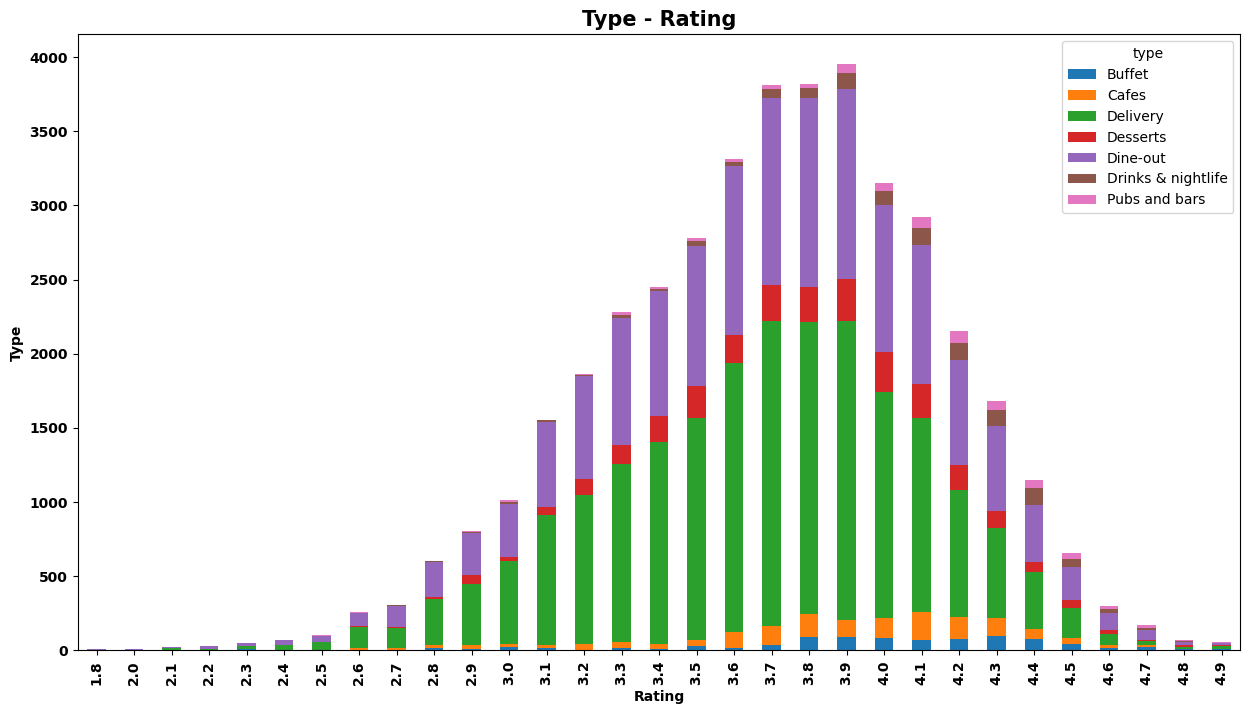

In [62]:
type_plt=pd.crosstab(df_num['rate'],df_cat['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.show()

### Best Affordable Restaurant in any Location

In [63]:
def budget_friendly(location,rest1):
    budget=data[(data['cost']<=400) & (data['location']==location) & 
                     (data['rate']>4) & (data['rest_type']==rest1)]
    return(budget['name'].unique())

In [64]:
budget_friendly('BTM',"Quick Bites")

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

### Which cities have the highest purchasing power in Banglore

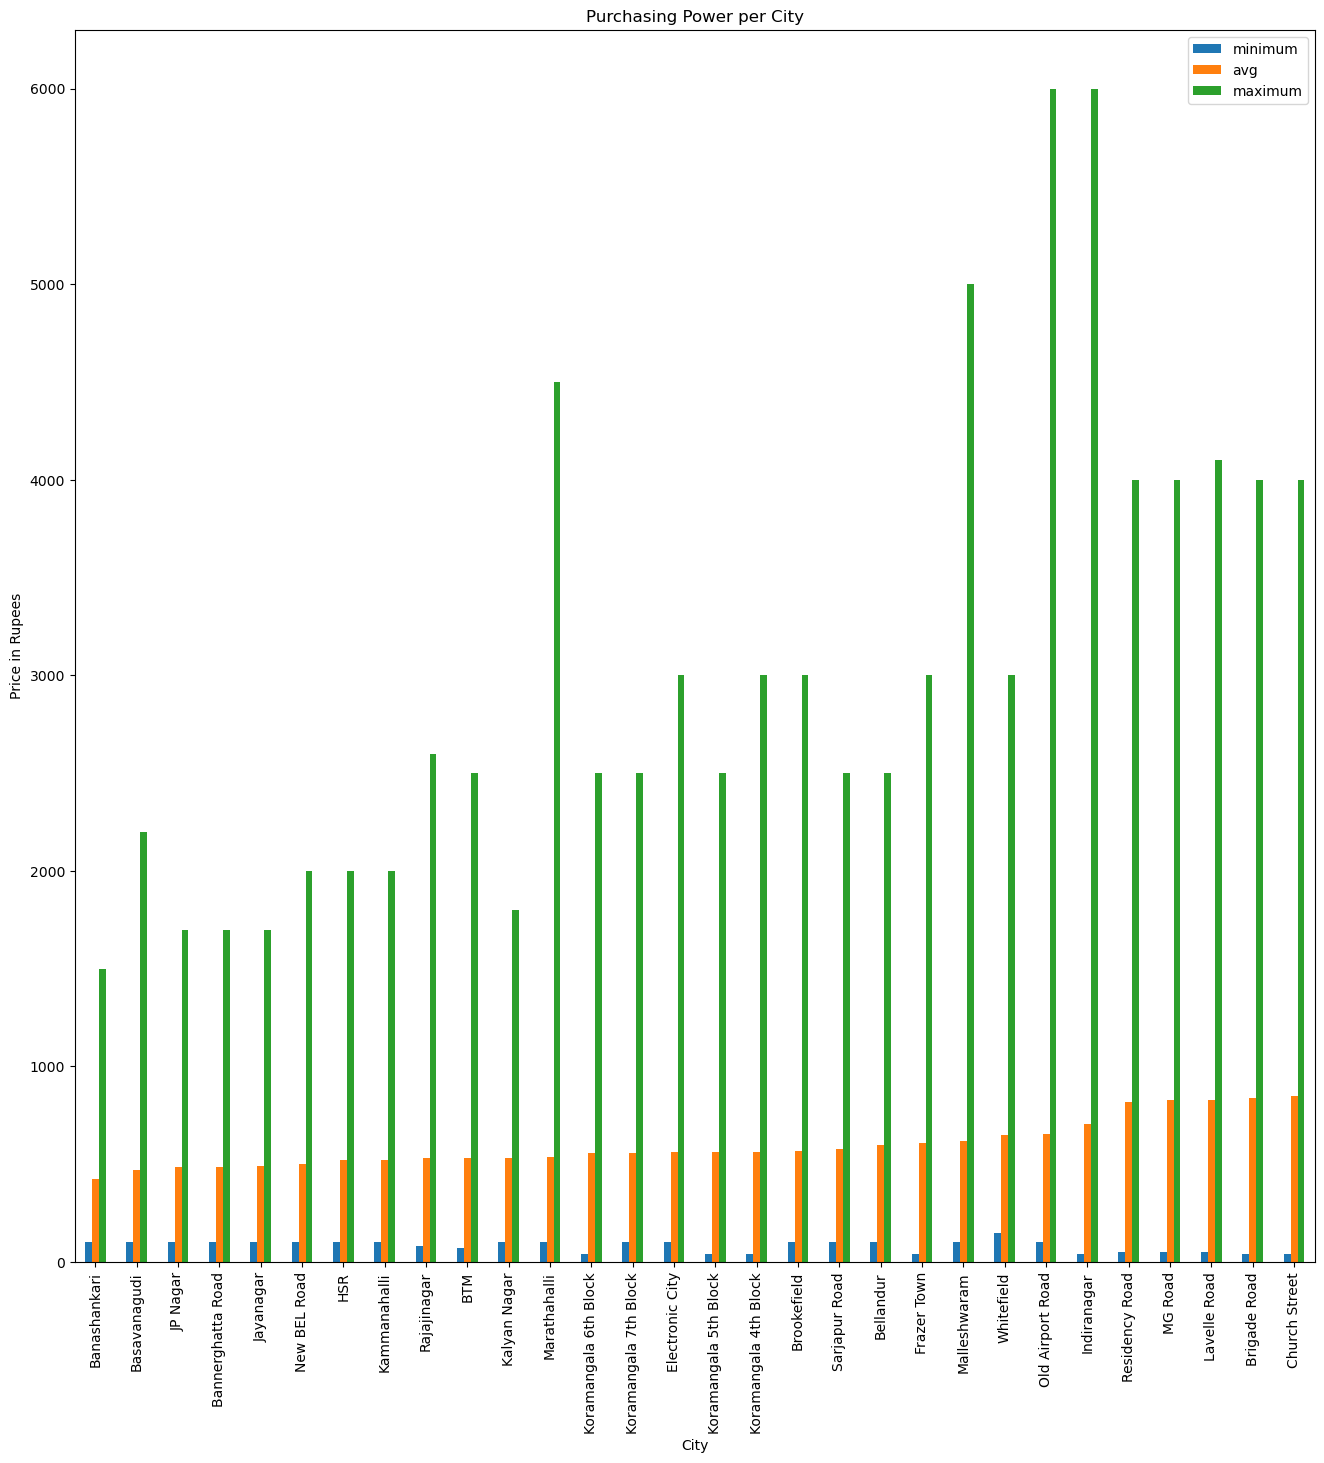

In [65]:
q6=data.groupby('city').agg(minimum=('cost','min'),avg=('cost','mean'),maximum=('cost','max')).sort_values(by='avg')
q6.plot(kind='bar',figsize=(16,16));
plt.title('Purchasing Power per City');
plt.ylabel('Price in Rupees');
plt.xlabel('City');

### ModelBuilding

In [66]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [67]:
data[['reviews_list']].value_counts()

reviews_list                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [68]:
df_cat.drop('reviews_list',axis=1,inplace=True)

In [69]:
df_cat

,name,online_order,book_table,location,rest_type,cuisines,type,city
0,Jalsa,Yes,Yes,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,Banashankari
1,Spice Elephant,Yes,No,Banashankari,Casual Dining,"Chinese, North Indian, Thai",Buffet,Banashankari
2,San Churro Cafe,Yes,No,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,Banashankari,Quick Bites,"South Indian, North Indian",Buffet,Banashankari
4,Grand Village,No,No,Basavanagudi,Casual Dining,"North Indian, Rajasthani",Buffet,Banashankari
...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,Whitefield,"Casual Dining, Bar","North Indian, Continental",Pubs and bars,Whitefield
51711,Bhagini,No,No,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,Whitefield,Bar,Continental,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,"ITPL Main Road, Whitefield",Bar,Finger Food,Pubs and bars,Whitefield


In [70]:
df_cat.describe().T

,count,unique,top,freq
name,41392,6627,Cafe Coffee Day,86
online_order,41392,2,Yes,27185
book_table,41392,2,No,35093
location,41392,92,BTM,3900
rest_type,41392,87,Quick Bites,14018
cuisines,41392,2376,North Indian,2125
type,41392,7,Delivery,20519
city,41392,30,BTM,2593


In [71]:
df_cat['online_order']=df_cat['online_order'].apply(lambda x: 1 if x=='Yes' else 0)
df_cat['book_table']=df_cat['book_table'].apply(lambda x: 1 if x=='Yes' else 0)

In [72]:
df_cat['book_table'].value_counts()

book_table
0    35093
1     6299
Name: count, dtype: int64

In [73]:
df_cat['online_order'].value_counts()

online_order
1    27185
0    14207
Name: count, dtype: int64

In [74]:
data.dtypes

name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
cuisines         object
cost            float64
reviews_list     object
type             object
city             object
dtype: object

### Encoding

In [75]:
def Encode(df):
    for column in data.columns[~data.columns.isin(['rate', 'cost', 'votes'])]:
        data[column] = data[column].factorize()[0]
    return data

zomato = Encode(data.copy())


In [76]:
zomato.head(12)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
0,0,0,0,4.1,775,0,0,0,800.0,0,0,0
1,1,0,1,4.1,787,0,0,1,800.0,1,0,0
2,2,0,1,3.8,918,0,1,2,800.0,2,0,0
3,3,1,1,3.7,88,0,2,3,300.0,3,0,0
4,4,1,1,3.8,166,1,0,4,600.0,4,0,0
5,5,0,1,3.8,286,1,0,5,600.0,5,0,0
6,6,1,1,3.6,8,2,0,6,800.0,6,0,0
7,7,0,0,4.6,2556,0,3,7,600.0,7,1,0
8,8,0,1,4.0,324,0,4,8,700.0,8,1,0
9,9,0,1,4.2,504,0,4,9,550.0,9,1,0


<Axes: >

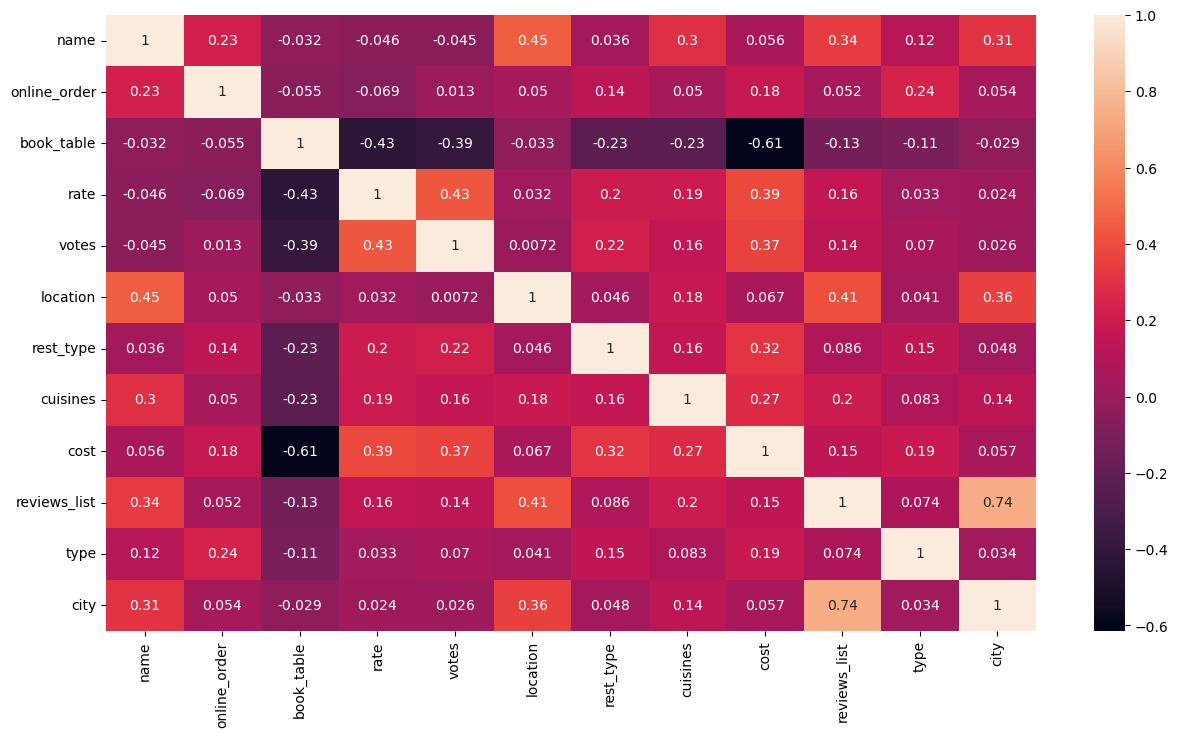

In [77]:
sns.heatmap(zomato.corr(),annot=True)

In [78]:
df_feature= zomato.drop('rate',axis=1)

df_target= zomato['rate']

In [79]:
## Assumption on Dependent variable to be numeric
df_target.dtype

dtype('float64')

In [80]:
X_full= df_feature.copy()
y_full= df_target.copy()

X_full= sm.add_constant(X_full)

X_train_full, X_test_full, y_train_full, y_test_full= train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

X_train_full (28974, 12)
y_train_full (28974,)
X_test_full (12418, 12)
y_test_full (12418,)


### Decision Tree

In [215]:
decision_tree_regressor = DecisionTreeRegressor( random_state = 10)

decision_tree = decision_tree_regressor.fit(X_train_full, y_train_full)

In [216]:
y_pred1 = decision_tree_regressor.predict(X_test_full)

In [217]:
r2 = r2_score(y_test_full, y_pred1)
print(f'R-squared: {r2}')

R-squared: 0.8529461763240515


In [218]:
mse = mean_squared_error(y_test_full, y_pred1)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.028675310033821864


In [219]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.16933785765097498


In [220]:
mae = mean_absolute_error(y_test_full, y_pred1)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.050257690449347844


**R-squared (R²): 0.8529**

Insight: An R² value of 0.8529 suggests that approximately 85.29% of the variability in the Zomato ratings can be explained by the model. This is quite high, indicating that the model fits the data well.

**Mean Squared Error (MSE): 0.0287**

Insight: An MSE of 0.0287 indicates that, on average, the squared difference between the actual and predicted ratings is 0.0287. This is a reasonably low value, suggesting that the model's predictions are quite close to the actual ratings.

**Root Mean Squared Error (RMSE): 0.1693**

Insight: An RMSE of 0.1693 indicates that the average error in the predicted ratings is about 0.1693. This value is relatively low, which implies that the model's predictions are generally accurate.

**Mean Absolute Error (MAE): 0.0503**

Insight: An MAE of 0.0503 suggests that, on average, the absolute difference between the actual and predicted ratings is 0.0503. This indicates that the model's predictions are very close to the actual values on average.

#### Summary of Decision Tree Insights:

- Model Performance: The Decision Tree model performs well, as indicated by the high R-squared value and low error metrics (MSE, RMSE, and MAE). This suggests that the model is effective at capturing the patterns in the data and making accurate predictions.
- Prediction Accuracy: The low values of RMSE and MAE indicate that the model's predictions are generally accurate and close to the actual Zomato ratings.

### Random Forest

In [82]:
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(X_train_full,y_train_full)

RandomForestRegressor(min_samples_leaf=0.0001, n_estimators=500,
                      random_state=329)

In [223]:
y_pred= RForest.predict(X_test_full)

In [243]:
from sklearn.metrics import r2_score
r2=r2_score(y_test_full,y_pred)
print('R-squared: ',r2)

R-squared:  0.9082599578571604


In [225]:
mse = mean_squared_error(y_test_full, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.024847838946054662


In [226]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.15763197310842322


In [227]:
mae = mean_absolute_error(y_test_full, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.08817492206746022


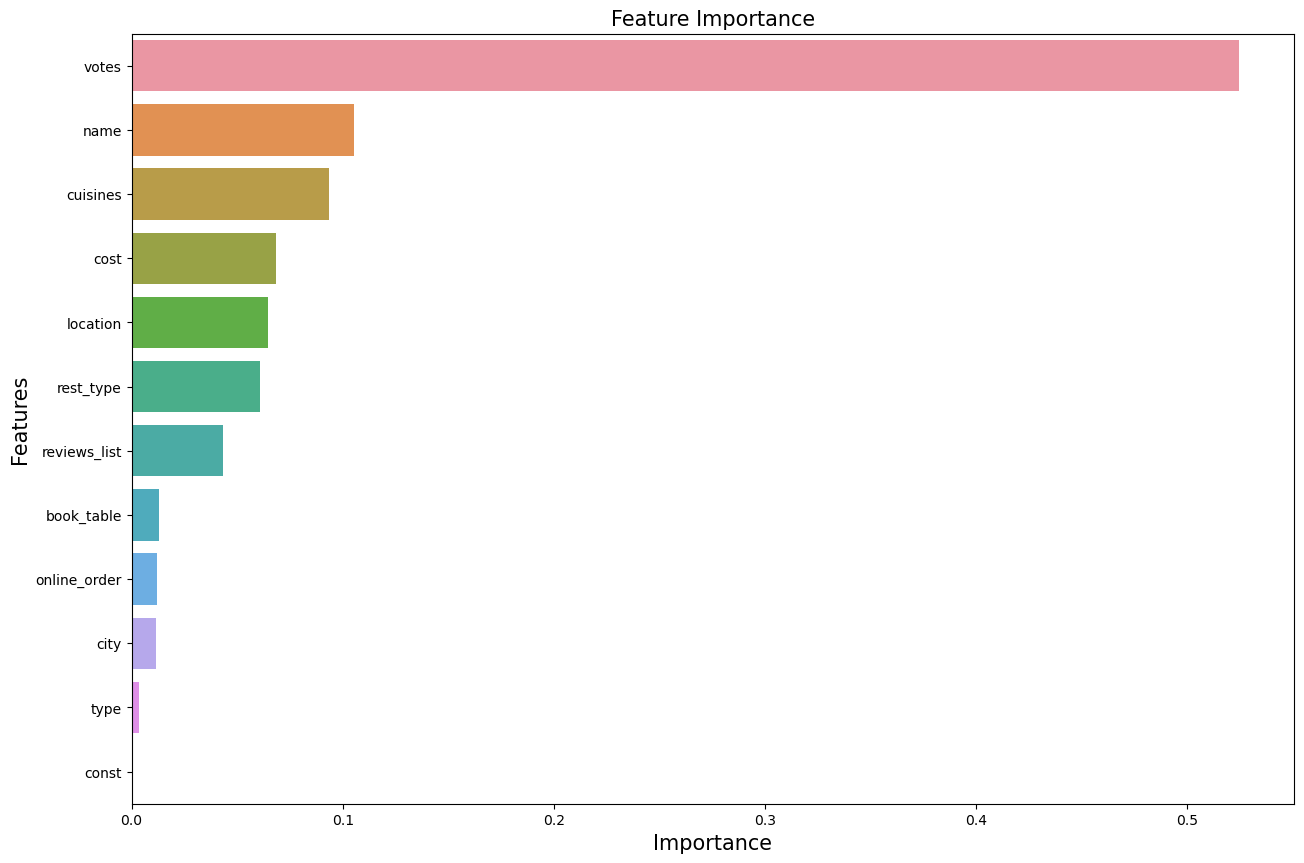

,Features,Importance
4,votes,0.524496
1,name,0.105210
7,cuisines,0.093296
8,cost,0.068279
5,location,0.064664
6,rest_type,0.060659
9,reviews_list,0.043484
3,book_table,0.013146
2,online_order,0.011823
11,city,0.011484


In [228]:
important_features = pd.DataFrame({'Features': X_train_full.columns, 
                                   'Importance': RForest.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(15, 10))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()
important_features

#### R² Score (Coefficient of Determination):
R² Score: 0.8725743622147034

Inference: The R² score of 0.87 indicates that approximately 87% of the variance in the target variable (Zomato ratings) is explained by the features in your model. This is a relatively high value, suggesting that the model has a good fit to the data.

#### Mean Squared Error (MSE):
Mean Squared Error: 0.024487838946054662

Inference: MSE is the average of the squared differences between the actual and predicted values. A lower MSE indicates better model performance. In this case, the MSE is quite low, suggesting that the model's predictions are close to the actual values.

#### Root Mean Squared Error (RMSE):
Root Mean Squared Error: 0.15763197310842322

Inference: RMSE is the square root of the MSE and provides an estimate of the standard deviation of the prediction errors. The RMSE of 0.1576 indicates that the typical prediction error is relatively small, which means the model's predictions are generally accurate.

#### Mean Absolute Error (MAE):
Mean Absolute Error: 0.08817492026746022
Inference: MAE is the average of the absolute differences between the actual and predicted values. The MAE of 0.0882 indicates that, on average, the model's predictions deviate from the actual values by about 0.0882 units. This is a low value, indicating good model performance.

#### Overall Inference:
The model demonstrates strong predictive performance based on the following observations:
- High R² Score: A high proportion of variance in the target variable is explained by the model.
- Low MSE and RMSE: The model's prediction errors are small, indicating good accuracy.
- Low MAE: The average absolute error is small, further suggesting that the predictions are close to the actual ratings.

### Hypertuning of parameters

In [102]:
grid_search ={'n_estimators': [5, 10, 30, 50, 70, 90, 110],
                     'max_depth': [None,5, 10, 15, 20],
                     'max_features': ['auto','sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11, 14],
                     'min_samples_leaf': [1, 2, 5],
                     'bootstrap':[True, False]}
 
RForest = RandomForestRegressor(random_state = 329)

rf_grid = GridSearchCV(estimator = RForest, 
                       param_grid = grid_search, 
                       cv = 2,
                      n_jobs=-1,
                      verbose=2,
                      scoring='neg_mean_squared_error')

rf_grid_model = rf_grid.fit(X_train_full, y_train_full)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Fitting 2 folds for each of 3150 candidates, totalling 6300 fits
Best parameters for random forest classifier:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 110} 



In [83]:
RForest=RandomForestRegressor(n_estimators=110,
                              bootstrap=False,
                              max_depth=None,
                              max_features='sqrt',
                              min_samples_leaf=1,
                              min_samples_split=2,
                              random_state=329,)
RForest.fit(X_train_full,y_train_full)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=110,
                      random_state=329)

In [231]:
y_pred= RForest.predict(X_test_full)

In [232]:
r2_score(y_test_full,y_pred)

0.9082599578571604

In [233]:
mse = mean_squared_error(y_test_full, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.017889192441257622


In [234]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.13375048576082862


In [235]:
mae = mean_absolute_error(y_test_full, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.06550154467854623


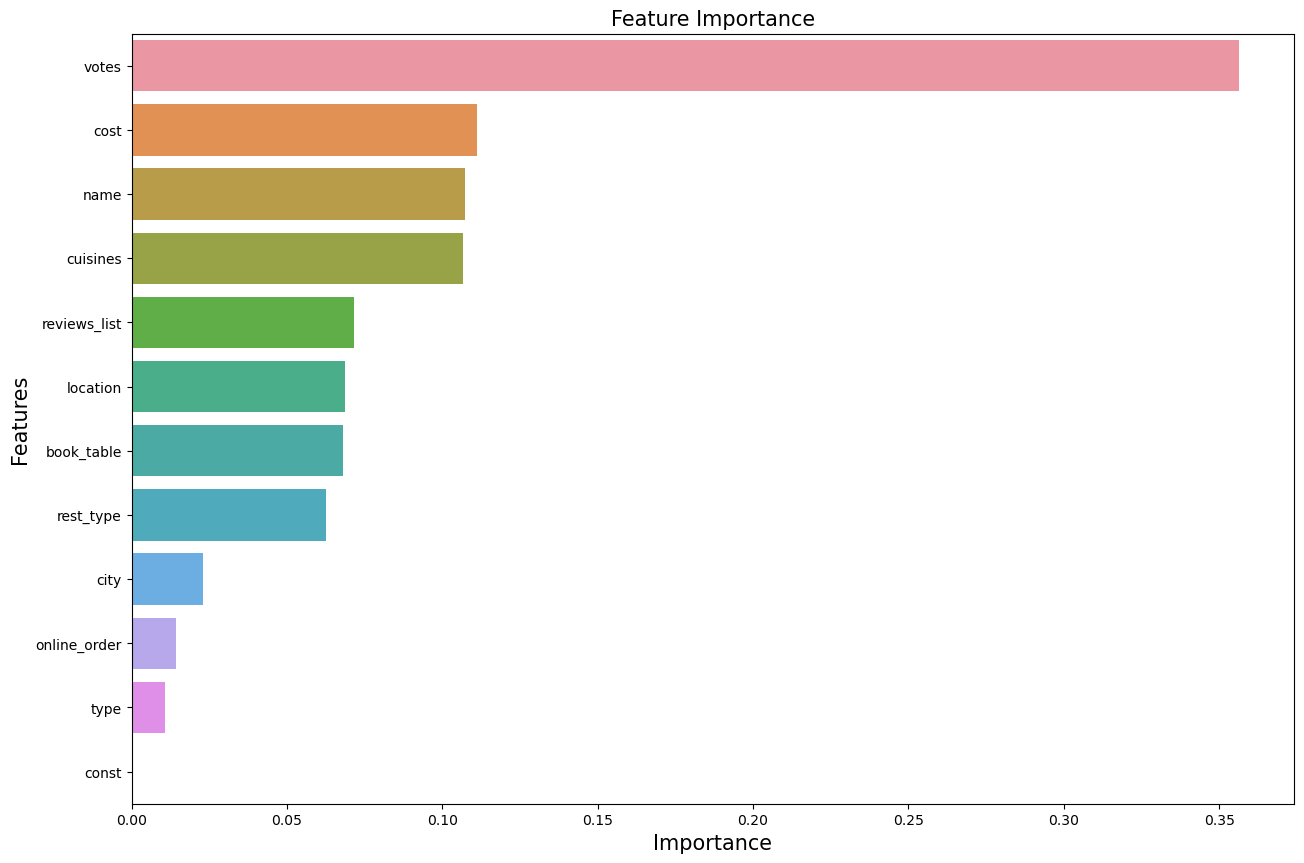

,Features,Importance
4,votes,0.356328
8,cost,0.111044
1,name,0.107423
7,cuisines,0.106623
9,reviews_list,0.071668
5,location,0.068650
3,book_table,0.067911
6,rest_type,0.062566
11,city,0.023018
2,online_order,0.014114


In [236]:
important_features = pd.DataFrame({'Features': X_train_full.columns, 
                                   'Importance': RForest.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(15, 10))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()
important_features

#### R-squared (R²): 0.9083
**Interpretation:** The R-squared value indicates that approximately 90.83% of the variance in the Zomato ratings can be explained by the Random Forest model.

**Insight:** This is a very high R² value, suggesting that the model has an excellent fit to the data.

#### Mean Squared Error (MSE): 0.0179
**Interpretation:** The MSE measures the average squared difference between the actual and predicted ratings.

**Insight:** An MSE of 0.0179 is lower than the Decision Tree's MSE (0.0287), indicating that the Random Forest model has better accuracy in its predictions.

#### Root Mean Squared Error (RMSE): 0.1338
**Interpretation:** The RMSE is the square root of the MSE and provides a measure of the average magnitude of the errors in the same units as the target variable.

**Insight:** An RMSE of 0.1338 is lower than the Decision Tree's RMSE (0.1693), which means the Random Forest model has fewer prediction errors.

#### Mean Absolute Error (MAE): 0.0655
**Interpretation:** The MAE measures the average magnitude of the errors without considering their direction.

**Insight:** An MAE of 0.0655 is slightly higher than the Decision Tree's MAE (0.0503). While this indicates that the Random Forest model's average error is slightly larger, it is still within a reasonable range.

### Insight from Feature Imporatance
- **Votes (Importance: 0.356328):**
Votes are the most significant feature, contributing over 35% to the model's predictive power. This indicates that the number of votes a restaurant receives is highly correlated with its rating. More votes often imply higher engagement and satisfaction from customers.

- **Cost (Importance: 0.111044):**
The cost of dining is the second most important feature. This suggests that the price range of a restaurant significantly impacts its rating. Customers tend to rate restaurants considering the value for money.

- **Name (Importance: 0.107423):**
Surprisingly, the restaurant's name holds considerable importance. This could be due to well-known or popular names often attracting better ratings.

- **Cuisines (Importance: 0.106623):**
The type of cuisines offered is another critical factor. Restaurants offering popular or diverse cuisines are likely to receive higher ratings.

- **Reviews List (Importance: 0.071668):**
The content of reviews is also significant. Detailed and positive reviews can boost a restaurant's rating, reflecting customer satisfaction.

- **Location (Importance: 0.068650):**
The restaurant's location is important but not as critical as the top features. Prime locations or accessible areas can influence higher ratings.

- **Book Table (Importance: 0.067911):**
The availability of a table booking feature is moderately important. Restaurants that offer convenient booking options might receive better ratings due to improved customer experience.

- **Rest Type (Importance: 0.062566):**
The type of restaurant (e.g., café, casual dining) also plays a role in determining its rating. Different types of restaurants cater to different customer expectations and experiences.

- **City (Importance: 0.023018):**
The city where the restaurant is located has some influence on the rating, although it is less significant than the other factors. This could be due to variations in customer preferences and dining trends across cities.

- **Online Order (Importance: 0.014114):**
The availability of online ordering is less important but still contributes to the rating. This feature might be more relevant in areas with high demand for food delivery services.

### Conclusion
- **Key Factors:** The number of votes, cost, name, and type of cuisines are the most critical factors influencing restaurant ratings on Zomato.
- **Moderate Factors:** Reviews, location, table booking options, and restaurant type also contribute significantly to the rating.
- **Lesser Factors:** The city, availability of online orders, and specific establishment type have a relatively minor impact.

### Cross validation

In [240]:
RForest = RandomForestRegressor(n_estimators=100, random_state=42)

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_scores = cross_val_score(RForest, X_train_full, y_train_full, cv=5, scoring=mse_scorer)

mean_mse = np.mean(cv_scores)
std_mse = np.std(cv_scores)

In [241]:
print(f'Cross-Validation Mean MSE: {-mean_mse}')
print(f'Cross-Validation MSE Standard Deviation: {std_mse}')

Cross-Validation Mean MSE: 0.02320671366395215
Cross-Validation MSE Standard Deviation: 0.00157065331751789


**Mean MSE (0.0232):**
The Mean Squared Error (MSE) represents the average squared difference between the actual values and the predicted values. An MSE of 0.0232 suggests that, on average, the squared differences between the actual Zomato ratings and the predicted ratings are 0.0232. This value can be considered relatively low, indicating that our model is performing reasonably well in predicting the Zomato ratings.

**MSE Standard Deviation (0.0016):**
The standard deviation of the MSE indicates the variability of the MSE across the different folds of the cross-validation. A standard deviation of 0.0016 is quite low, indicating that the model's performance is stable and consistent across the different cross-validation folds.

**Conclusion:**
Random Forest Regressor model appears to perform well in predicting Zomato ratings, as indicated by the low Mean MSE.
The low standard deviation of the MSE further supports that the model's performance is consistent and reliable across different data subsets.

### Comparison and Conclusion:
- Model Performance: The Random Forest model outperforms the Decision Tree model across most metrics, particularly in terms of R-squared, MSE, and RMSE. This suggests that the Random Forest model is better at capturing the complexity of the data and making more accurate predictions.
- Prediction Accuracy: The lower MSE and RMSE values of the Random Forest model indicate that it has fewer and smaller prediction errors compared to the Decision Tree model. The MAE is slightly higher for the Random Forest, but this difference is relatively small and can be considered negligible in the context of the overall performance.
- Ensemble Method Advantage: The improvement in performance metrics with the Random Forest model highlights the advantage of using ensemble methods. Random Forests combine multiple decision trees to reduce overfitting and improve generalization, leading to better overall model performance.